<a href="https://colab.research.google.com/github/Praveen5026/praveen/blob/main/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explained variance ratio by PCA components: [0.17587441 0.1430647  0.10205412 0.09263698 0.09057549 0.08827938
 0.08490119 0.07327328 0.05920324 0.04935363]
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.6656875
Test set accuracy with best params: 0.6670

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1984
           1       0.69      0.62      0.65      2016

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000



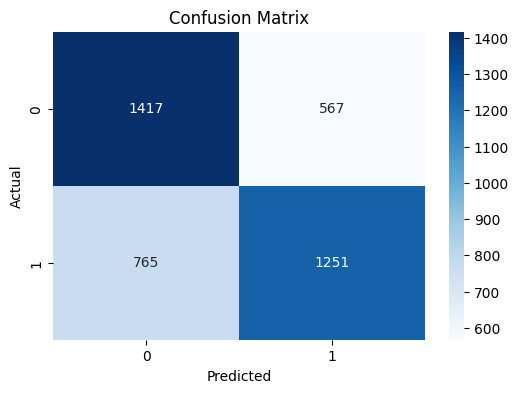

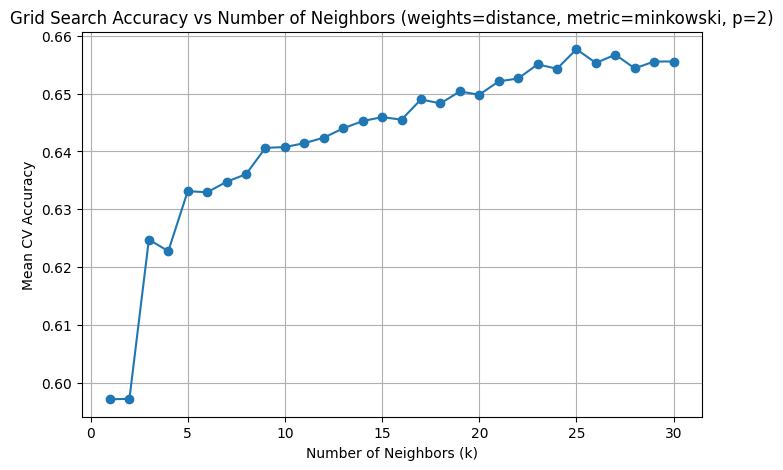


Sample predictions (first 20 test samples):
    Actual  Predicted
0        1          1
1        0          0
2        0          0
3        1          1
4        0          0
5        1          0
6        0          1
7        0          1
8        0          0
9        0          0
10       0          1
11       0          0
12       0          0
13       1          0
14       1          0
15       0          0
16       0          0
17       0          1
18       0          0
19       0          0
20       0          0
21       1          1
22       0          1
23       0          0
24       0          0
25       1          1
26       1          0
27       0          0
28       1          1
29       1          1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('cardio_train.csv.zip', sep=';')

# Sample 20,000 instances (adjust if needed)
df_sampled = df.sample(n=20000, random_state=42)

# Features and target
X = df_sampled.drop(['id', 'cardio'], axis=1)
y = df_sampled['cardio']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (try with 10 components)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")

# Setup KNN and parameter grid for GridSearchCV
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best estimator to predict on test data
best_knn = grid_search.best_estimator_
y_pred_final = best_knn.predict(X_test_pca)

# Test accuracy and report
acc = accuracy_score(y_test, y_pred_final)
print(f"Test set accuracy with best params: {acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Plot accuracy vs K from grid search results (filter by weights='distance' and metric='minkowski' with p=2)
results = pd.DataFrame(grid_search.cv_results_)
filtered = results[(results['param_weights'] == 'distance') &
                   (results['param_metric'] == 'minkowski') &
                   (results['param_p'] == 2)]
plt.figure(figsize=(8,5))
plt.plot(filtered['param_n_neighbors'].astype(int), filtered['mean_test_score'], marker='o')
plt.title('Grid Search Accuracy vs Number of Neighbors (weights=distance, metric=minkowski, p=2)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

# Show sample actual vs predicted for first 20 test samples
sample_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_final}).head(30)
print("\nSample predictions (first 20 test samples):")
print(sample_results)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🌳 Decision Tree Structure Info:
Tree depth: 5
Number of leaves: 30
Total nodes: 59

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 16}
Accuracy: 0.7350

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1984
           1       0.74      0.72      0.73      2016

    accuracy                           0.73      4000
   macro avg       0.74      0.74      0.73      4000
weighted avg       0.74      0.73      0.73      4000



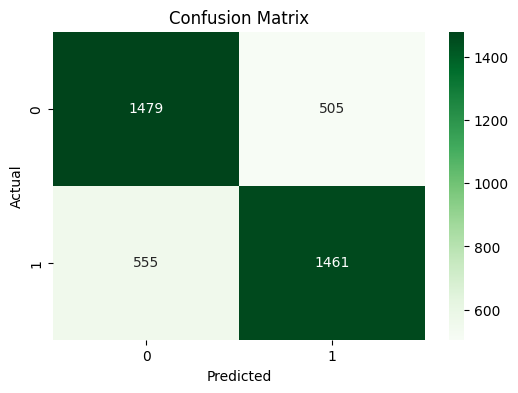

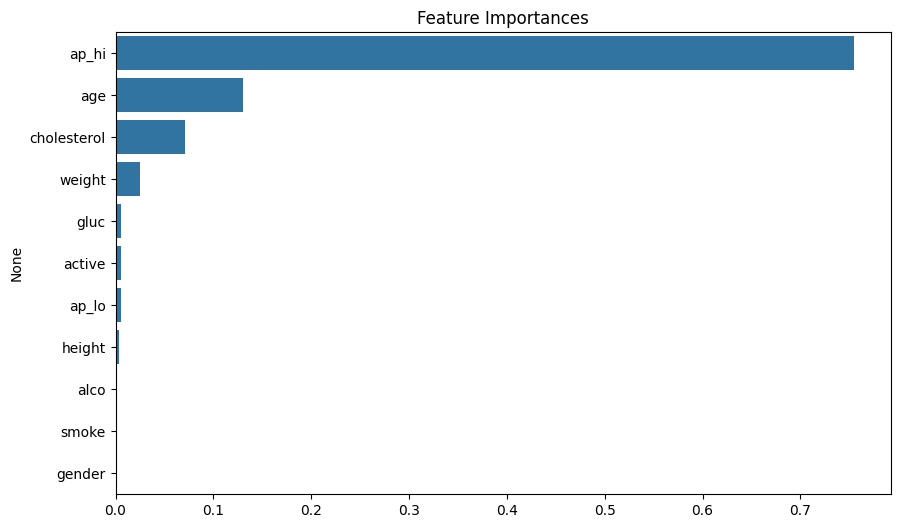

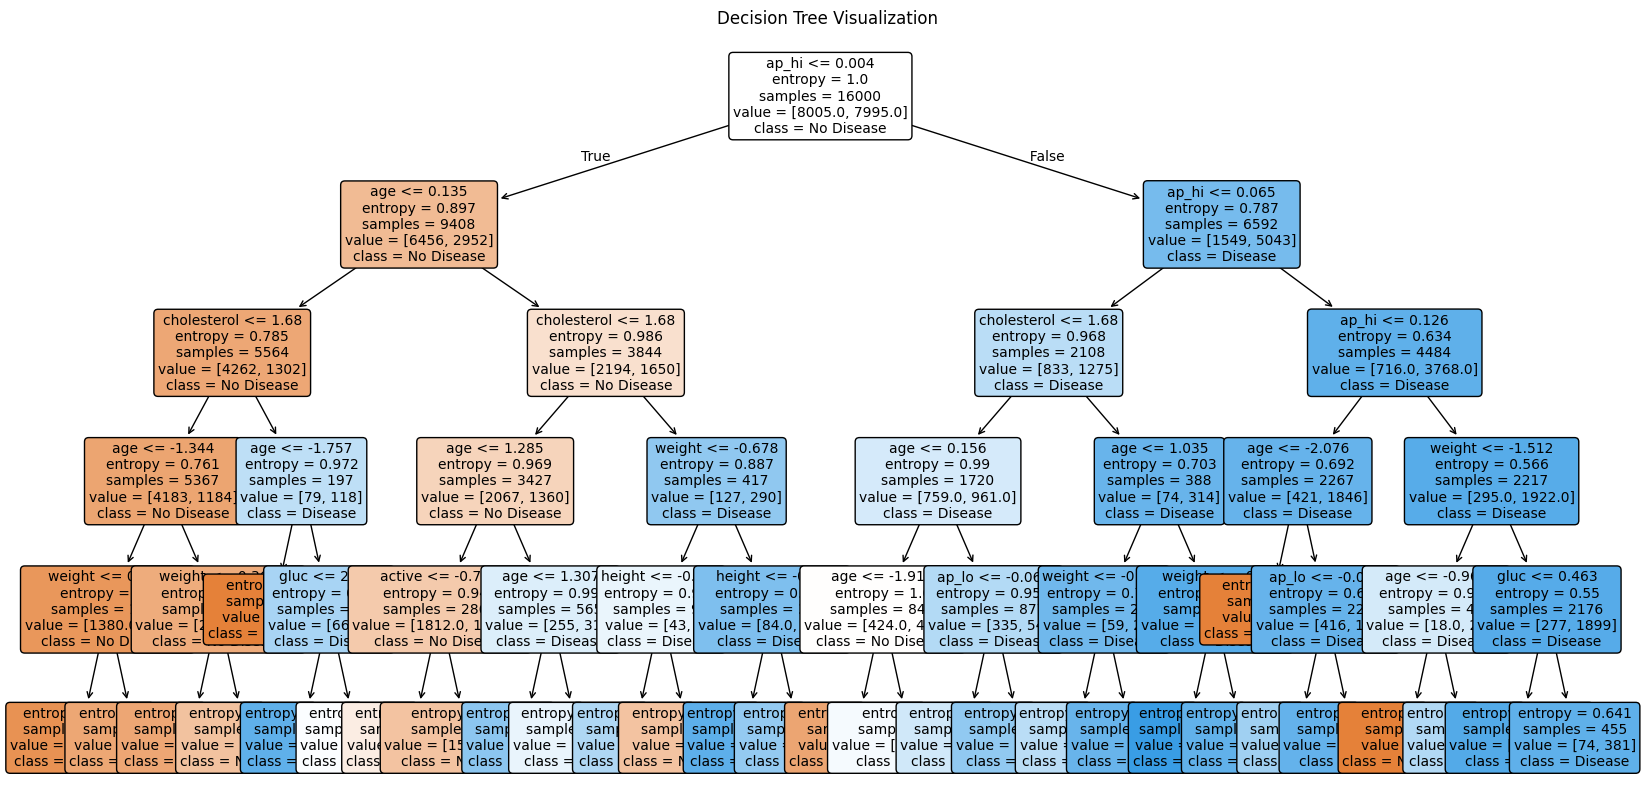

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Load dataset
df = pd.read_csv('cardio_train.csv.zip', sep=';')

# Sample 10,000 instances for faster training
df_sampled = df.sample(n=20000, random_state=42)

# Features and target
X = df_sampled.drop(['id', 'cardio'], axis=1)
y = df_sampled['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# (Optional) Scale data - not required for Decision Trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Decision Tree and hyperparameter search space
dt = DecisionTreeClassifier(random_state=42)
param_dist = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Train the model
random_search.fit(X_train_scaled, y_train)
best_dt = random_search.best_estimator_

# Fit model
random_search.fit(X_train_scaled, y_train)
best_dt = random_search.best_estimator_

# ✅ Tree size details
print("\n🌳 Decision Tree Structure Info:")
print("Tree depth:", best_dt.get_depth())
print("Number of leaves:", best_dt.get_n_leaves())
print("Total nodes:", best_dt.tree_.node_count)


# Predict
y_pred = best_dt.predict(X_test_scaled)

# Metrics
print(f"\nBest Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
features = X.columns
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.show()

# 🌳 Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}
Accuracy: 0.7348

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      1952
           1       0.76      0.69      0.72      1958

    accuracy                           0.73      3910
   macro avg       0.74      0.73      0.73      3910
weighted avg       0.74      0.73      0.73      3910



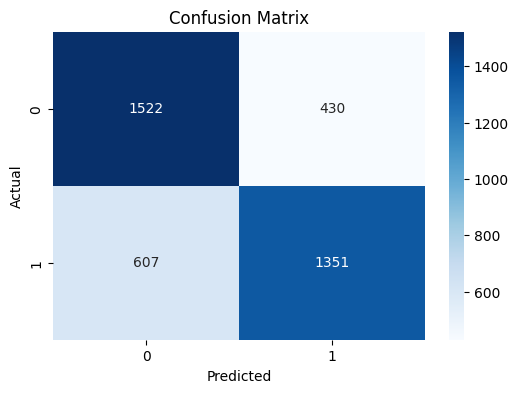

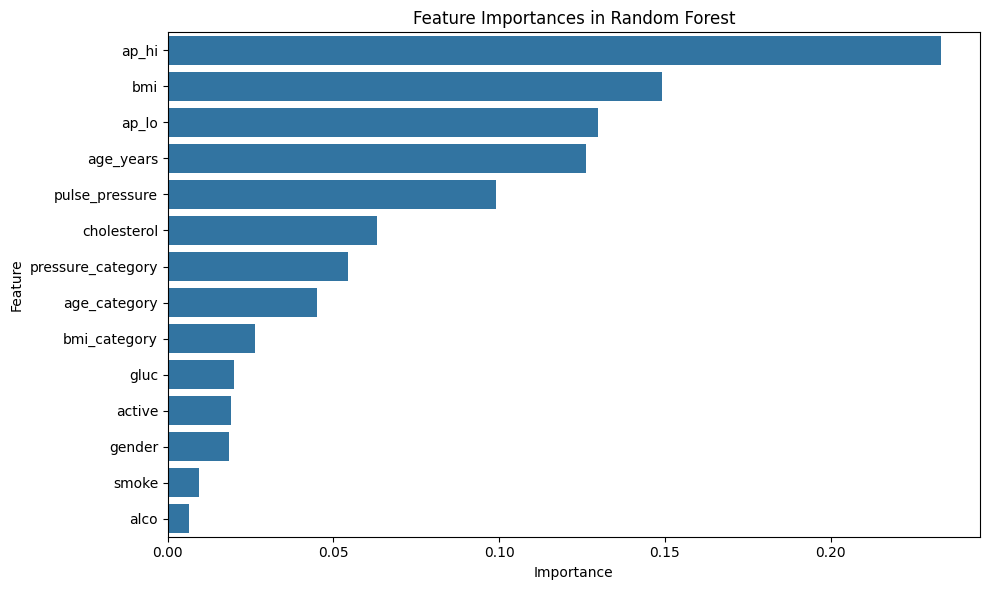

Number of trees in the best Random Forest: 250


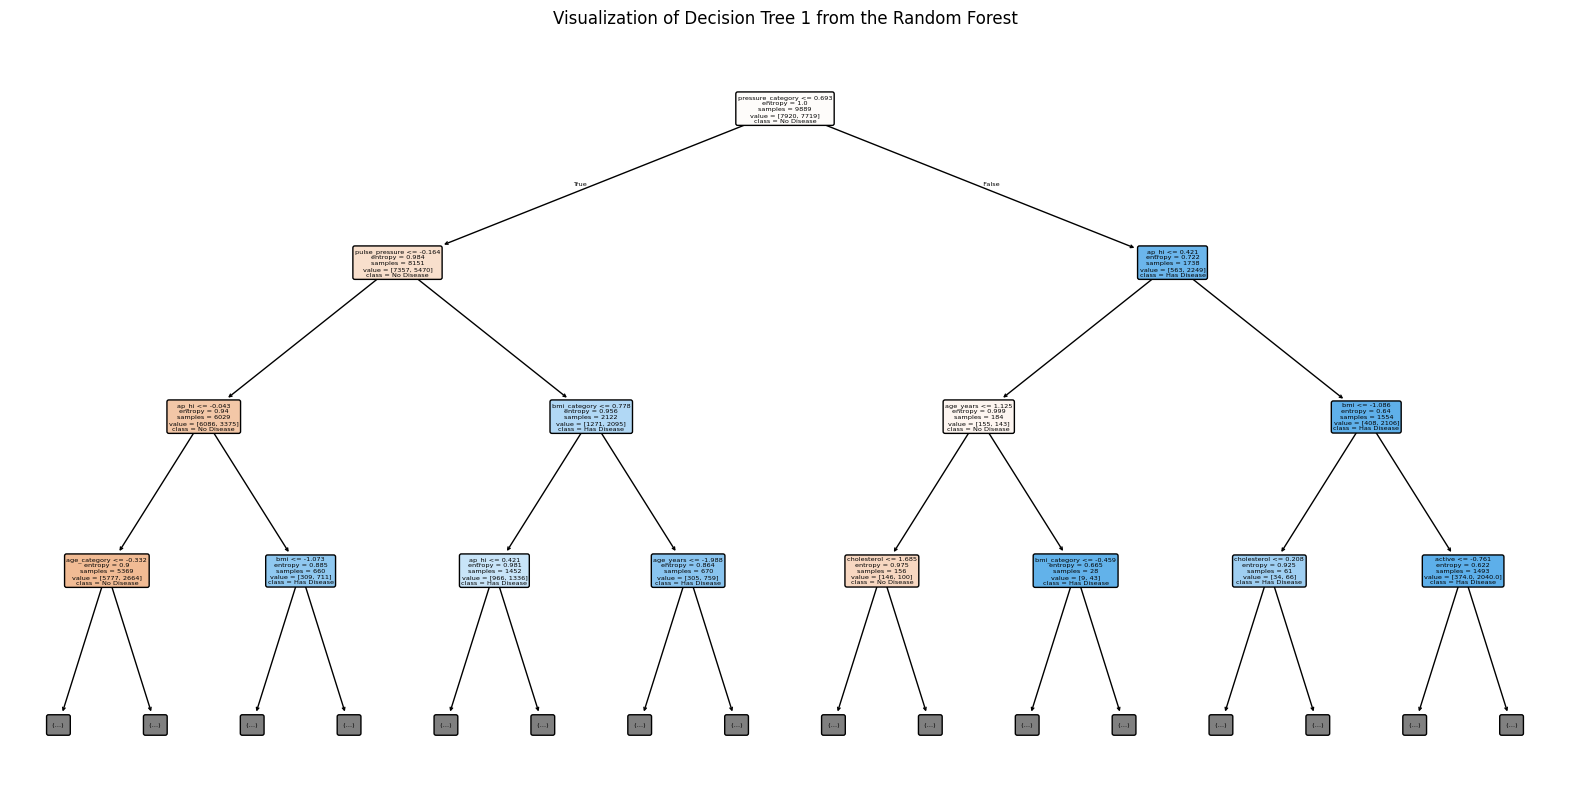

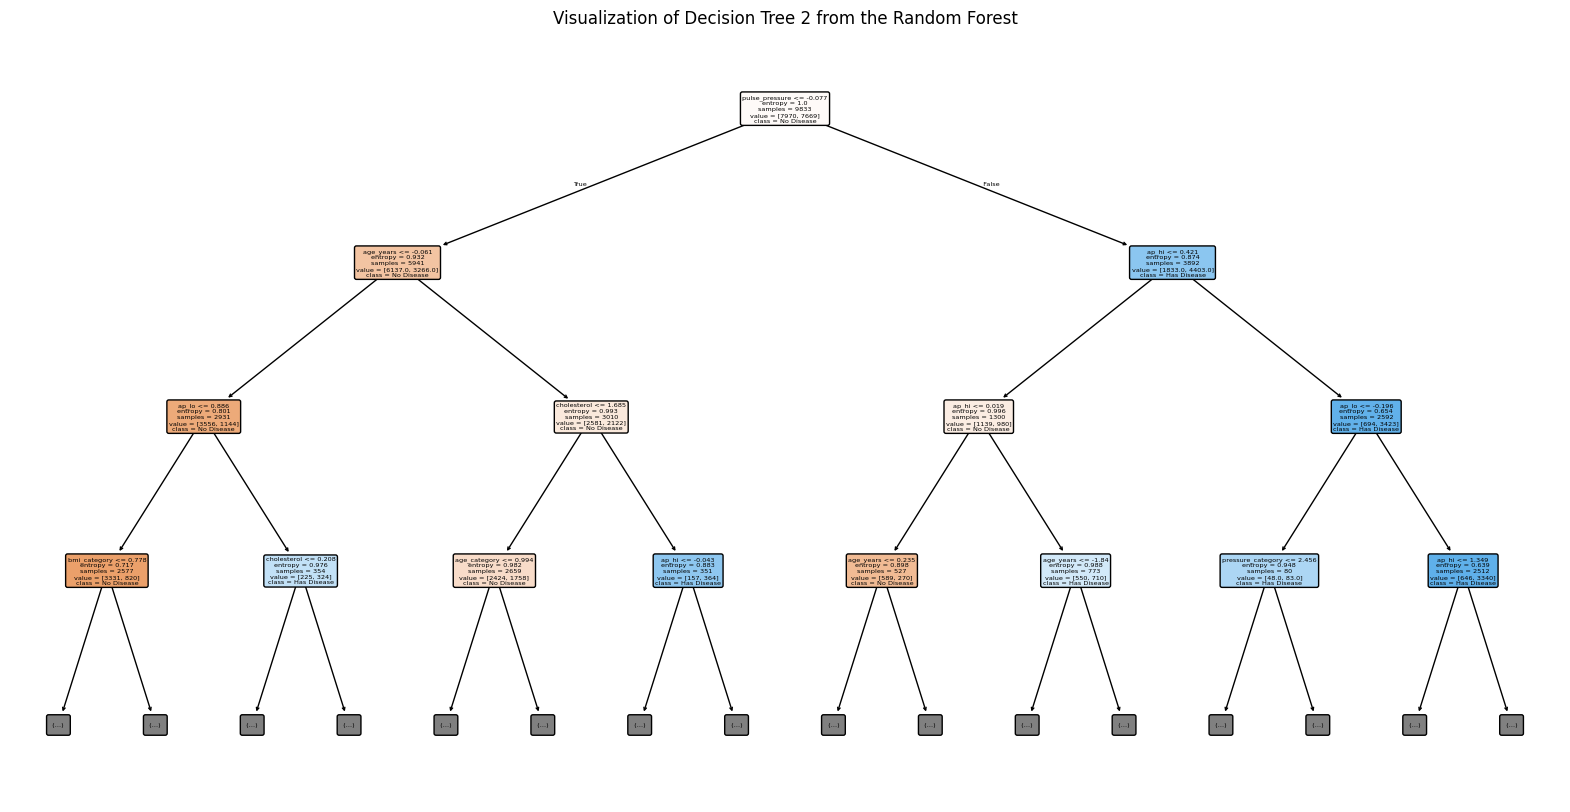

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree+

# Load dataset
df = pd.read_csv('cardio_train.csv.zip', sep=';')

# Sample and clean
df = df.sample(n=20000, random_state=42)
df = df[(df['ap_hi'] > 80) & (df['ap_hi'] < 200)]
df = df[(df['ap_lo'] > 50) & (df['ap_lo'] < 150)]

# Feature engineering
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['age_years'] = df['age'] // 365
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Categorize some features safely (fill NaN with 0 before converting)
df['age_category'] = pd.cut(df['age_years'], bins=[0, 40, 50, 60, 70], labels=[0, 1, 2, 3], include_lowest=True)
df['age_category'] = df['age_category'].fillna(0).astype(int)

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=[0, 1, 2, 3], include_lowest=True)
df['bmi_category'] = df['bmi_category'].fillna(0).astype(int)

df['pressure_category'] = pd.cut(df['pulse_pressure'], bins=[0, 30, 50, 70, 200], labels=[0, 1, 2, 3], include_lowest=True)
df['pressure_category'] = df['pressure_category'].fillna(0).astype(int)

# Prepare features and target
X = df.drop(['id', 'cardio', 'age', 'height', 'weight'], axis=1)
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search for hyperparameters with expanded param grid for better tuning
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train_scaled, y_train)

# Best model from grid search
best_rf = grid.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print("\nBest Parameters:", grid.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Number of trees in the forest
print(f"Number of trees in the best Random Forest: {best_rf.n_estimators}")

# Visualize two trees from the Random Forest
for i in range(2):
    plt.figure(figsize=(20, 10))
    tree = best_rf.estimators_[i]
    plot_tree(tree, feature_names=X.columns, class_names=["No Disease", "Has Disease"],
              filled=True, rounded=True, max_depth=3)
    plt.title(f"Visualization of Decision Tree {i+1} from the Random Forest")
    plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.7322

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1952
           1       0.77      0.67      0.71      1958

    accuracy                           0.73      3910
   macro avg       0.74      0.73      0.73      3910
weighted avg       0.74      0.73      0.73      3910



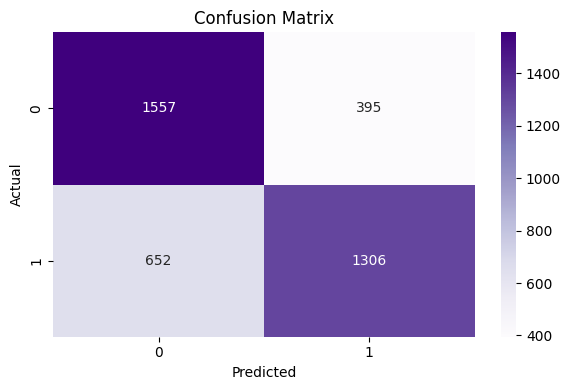

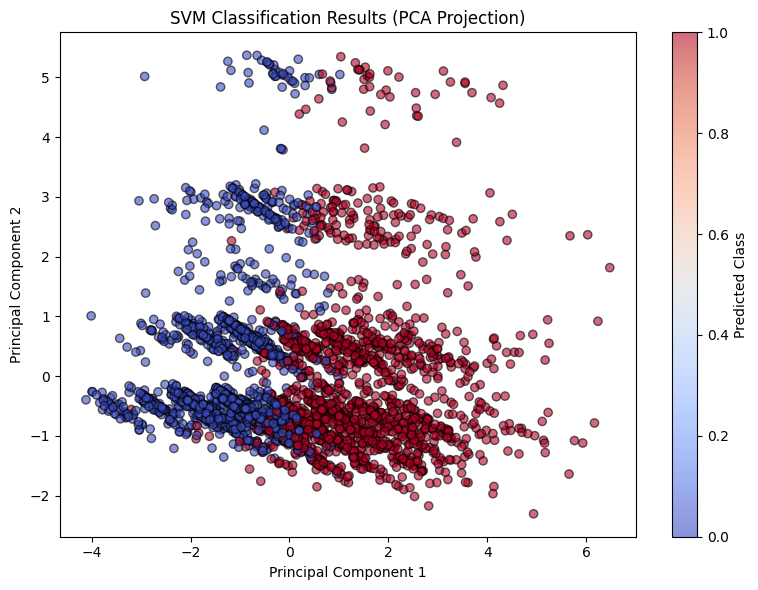

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load and sample data
df = pd.read_csv('cardio_train.csv.zip', sep=';')
df = df.sample(n=20000, random_state=42)
df = df[(df['ap_hi'] > 80) & (df['ap_hi'] < 200)]
df = df[(df['ap_lo'] > 50) & (df['ap_lo'] < 150)]

# Feature engineering
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['age_years'] = df['age'] // 365
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Optional categorical features (if needed later)
# df['age_category'] = pd.cut(df['age_years'], bins=[0, 40, 50, 60, 70], labels=[0, 1, 2, 3]).astype(int)
# df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=[0, 1, 2, 3]).astype(int)

# Define features and target
X = df.drop(['id', 'cardio', 'age', 'height', 'weight'], axis=1)
y = df['cardio']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

# Best model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Output
print("\nBest Parameters:", grid.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# PCA for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.title("SVM Classification Results (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Predicted Class')
plt.tight_layout()
plt.show()


Accuracy: 0.734

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1952
           1       0.77      0.67      0.72      1958

    accuracy                           0.73      3910
   macro avg       0.74      0.73      0.73      3910
weighted avg       0.74      0.73      0.73      3910



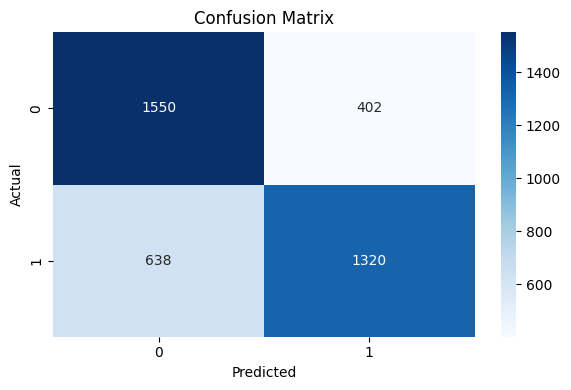

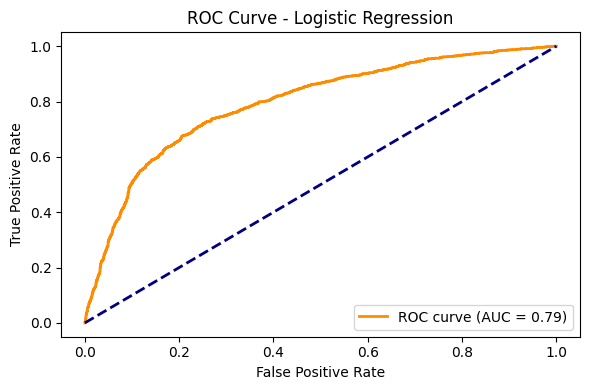

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv('cardio_train.csv.zip', sep=';')

# Sample and clean
df = df.sample(n=20000, random_state=42)
df = df[(df['ap_hi'] > 80) & (df['ap_hi'] < 200)]
df = df[(df['ap_lo'] > 50) & (df['ap_lo'] < 150)]

# Feature engineering
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['age_years'] = df['age'] // 365
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Select features and target
X = df.drop(['id', 'cardio', 'age', 'height', 'weight'], axis=1)
y = df['cardio']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
